## Importing Libraries

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Reading data

In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/COVIDSenti-A.csv")
print(df)

                                                   tweet label
0      Coronavirus | Human Coronavirus Types | CDC ht...   neu
1      @shehryar_taseer That‚Äôs üíØ true , \nCorona...   neu
2      TLDR: Not SARS, possibly new coronavirus. Diff...   neg
3      Disease outbreak news from the WHO: Middle Eas...   neu
4      China - Media: WSJ says sources tell them myst...   neu
...                                                  ...   ...
29995  CDC: Re-test confirms Westerdam cruise ship pa...   neu
29996  Two doctors die of coronavirus within 24 hours...   neu
29997  BEIJING - The lockdown of Guo Jing's neighbour...   neu
29998  #CoronavirusOutbreak in #Balochistan !!\n#CPEC...   neu
29999  The Australian dollar has hit a fresh decade l...   neu

[30000 rows x 2 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   30000 non-null  object
 1   label   30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


In [4]:
df.describe()

,tweet,label
count,30000,30000
unique,29987,3
top,Copper price and coronavirus: ‚ÄúBlack swan li...,neu
freq,3,22949


In [5]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

There is no missing values

#Data Preprocessing

In [6]:
!pip install neattext
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Cleaning Text: Multiple hashtags
df['clean_tweet'] = df['tweet'].apply(nfx.remove_hashtags)

# Cleaning Text: userhandles
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

# Cleaning Text : custom remove special characters (':', ',', ';', '.', '|','-','_','^', [&amp, &yen, ....])
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_custom_pattern(x,':+|\,+|\;+|\.+|\"+|\|+|\-+|\_+|\%+|\^|\*|\&[a-zA-Z]*'))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_custom_words(x,'\n'))

# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_punctuations)

# Cleaning Text: dates
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_dates)

# Cleaning Text: Emails
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_emails)

# Cleaning Text: Numbers
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_numbers)

# Cleaning Text: Special Character
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_special_characters)

# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [8]:
df=df.drop("tweet", axis = 1)

In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

tags = "[^A-Za-z]+"


def preprocess_text(sentence):
    
    sentence = re.sub(tags,' ', str(sentence).lower()).strip()
    text = []
    w=""
    for word in sentence.split():
        
        if word not in stopwords and len(word) >= 3:
            text.append(word)
                
    return " ".join([str(i) for i in text])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df.clean_tweet = df.clean_tweet.map(preprocess_text)
df.head()

,label,clean_tweet
0,neu,coronavirus human coronavirus types cdc
1,neu,thats true corona virus swine flue bird flu de...
2,neg,tldr sars possibly new coronavirus difficult c...
3,neu,disease outbreak news middle east respiratory ...
4,neu,china media wsj says sources tell mystery pneu...


In [11]:
# Extracting Target / Class Labels
# Extracting Attributes / Features
y=df["label"]
X=df.drop("label", axis = 1)

In [12]:
X.shape

(30000, 1)

In [13]:
encoding = {'neg': 0,
            'neu': 1,
            'pos':2,
           }
           

y.replace(encoding, inplace=True)

In [14]:
y=y.values.reshape(-1,1)

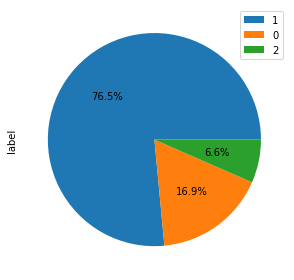

In [15]:
df.label.value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout ()

In [16]:
# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
print(X_train.shape, X_test.shape)

(21000, 1) (9000, 1)


In [17]:
df_train = pd.DataFrame()
df_train['tweet'] = X_train
df_train['label'] = y_train
df_train

,tweet,label
28465,two suspected covid cases registered jalisco t...,0
27622,hello uploaded report canadians effected covid,1
28376,wish could coronavirus,1
10917,cases coronavirus mississippi health officials...,1
27234,facebook bowing gdc citing coronavirus concerns,1
...,...,...
29802,south koreairanitaly confirmed cases surge cra...,0
5390,michael coston japan moh new coronavirus cases...,1
860,report passenger arrives lax potential coronav...,1
15795,might coronavirus change world comments,1


In [18]:
df_test = pd.DataFrame()
df_test['tweet'] = X_test
df_test['label'] = y_test
df_test
     

,tweet,label
2308,stay safe healthy moots whose countries get in...,1
22404,corona virus thanos crazy,0
23397,end world coronavirus panic african locust pla...,1
25058,prevent spread covid hong kong diocese cancels...,1
2664,chinese leader warns grave coronavirus crisis via,1
...,...,...
3941,million potential carriers left wuhan coronavi...,1
17854,corona virus lied whole cities china shut chin...,0
95,think new coronavirus reaches tougher stance a...,1
6279,white house tells airlines may suspend flights...,1


In [19]:
tf_idf_vect = TfidfVectorizer(max_features = 5000)
tf_idf_vect.fit(df['clean_tweet'])
X_train_tfidf = tf_idf_vect.transform(df_train['tweet'])
X_test_tfidf = tf_idf_vect.transform(df_test['tweet'])

In [20]:
print(X_train_tfidf)

  (0, 4634)	0.3880968600153727
  (0, 4349)	0.4224611575497165
  (0, 3584)	0.691318895121758
  (0, 1007)	0.3404997090645459
  (0, 650)	0.2775707675216418
  (1, 4687)	0.5741678971883154
  (1, 3629)	0.3647689732962583
  (1, 2053)	0.4812338803666768
  (1, 1007)	0.2827985801145946
  (1, 609)	0.4750933986398273
  (2, 4895)	0.831123043281413
  (2, 983)	0.5360185101200183
  (2, 956)	0.14804946381313958
  (3, 4732)	0.3629993084300912
  (3, 3808)	0.5158611702685612
  (3, 3026)	0.5234730184953682
  (3, 2036)	0.42166915188137394
  (3, 956)	0.13221367803355036
  (3, 650)	0.36443027273849976
  (4, 1870)	0.5893546202756013
  (4, 1622)	0.439016216951415
  (4, 956)	0.08584874141609676
  (4, 873)	0.36630880041620956
  (4, 766)	0.5642461777880111
  (5, 4732)	0.3126560193908282
  :	:
  (20996, 744)	0.16465551155018696
  (20996, 650)	0.21074020739796656
  (20997, 4374)	0.29132219154734423
  (20997, 3629)	0.312548892663656
  (20997, 3305)	0.34811234297086047
  (20997, 3144)	0.35872293246590553
  (20997, 252

In [21]:
print(X_test_tfidf)

  (0, 4867)	0.4190299712998986
  (0, 4216)	0.29203785410860034
  (0, 3781)	0.2958302569247203
  (0, 2688)	0.4228657618958884
  (0, 2288)	0.23636272951895307
  (0, 2038)	0.36060178311616753
  (0, 1891)	0.23468109032351334
  (0, 1514)	0.38964890162083615
  (0, 988)	0.27491931154385824
  (0, 956)	0.06643558521152973
  (1, 4753)	0.35188741740138774
  (1, 1017)	0.8583930941032938
  (1, 953)	0.37327810205040857
  (2, 4921)	0.21640694626117798
  (2, 4138)	0.4086402628879981
  (2, 3228)	0.31743610297815184
  (2, 3123)	0.28560670907338914
  (2, 2622)	0.4274172210177732
  (2, 1675)	0.23184323877292645
  (2, 1467)	0.30479168461657546
  (2, 956)	0.0642006458130832
  (2, 198)	0.3849840933255323
  (2, 80)	0.349535524918236
  (3, 4174)	0.272431838590318
  (3, 3356)	0.3840433190394571
  :	:
  (8996, 744)	0.29227856050601064
  (8996, 477)	0.3372568467048044
  (8997, 4461)	0.553612750923858
  (8997, 3524)	0.7257885052345758
  (8997, 2943)	0.38332880485565884
  (8997, 956)	0.1407231148454679
  (8998, 486

In [22]:
print(tf_idf_vect.vocabulary_)

{'coronavirus': 956, 'human': 2156, 'types': 4636, 'cdc': 675, 'thats': 4445, 'true': 4604, 'corona': 953, 'virus': 4753, 'swine': 4365, 'bird': 423, 'flu': 1758, 'december': 1122, 'whole': 4865, 'busy': 580, 'sars': 3801, 'possibly': 3296, 'new': 2943, 'difficult': 1238, 'confirm': 887, 'patients': 3157, 'identified': 2187, 'later': 2509, 'infection': 2290, 'disease': 1269, 'outbreak': 3080, 'news': 2950, 'middle': 2797, 'east': 1409, 'respiratory': 3666, 'syndrome': 4375, 'mers': 2778, 'cov': 1000, 'united': 4666, 'arab': 219, 'china': 744, 'media': 2754, 'wsj': 4948, 'says': 3810, 'sources': 4130, 'tell': 4414, 'mystery': 2902, 'pneumonia': 3263, 'something': 4112, 'causing': 668, 'family': 1651, 'virologists': 4749, 'weigh': 4837, 'novel': 2990, 'chinas': 745, 'chinese': 748, 'authorities': 296, 'made': 2666, 'preliminary': 3335, 'keep': 2436, 'saying': 3809, 'unknown': 4671, 'cause': 665, 'obviously': 3010, 'related': 3589, 'lets': 2557, 'report': 3629, 'mysterious': 2901, 'illnes

## Building Model

In [23]:
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [24]:
svm_pred = model.predict(X_test_tfidf)
test_pred = pd.DataFrame()
test_pred['tweet'] = X_test
test_pred['label'] = svm_pred
test_pred

,tweet,label
2308,stay safe healthy moots whose countries get in...,2
22404,corona virus thanos crazy,0
23397,end world coronavirus panic african locust pla...,1
25058,prevent spread covid hong kong diocese cancels...,1
2664,chinese leader warns grave coronavirus crisis via,1
...,...,...
3941,million potential carriers left wuhan coronavi...,1
17854,corona virus lied whole cities china shut chin...,1
95,think new coronavirus reaches tougher stance a...,1
6279,white house tells airlines may suspend flights...,1


In [25]:
test_pred['label'].value_counts()

1    7435
0    1252
2     313
Name: label, dtype: int64

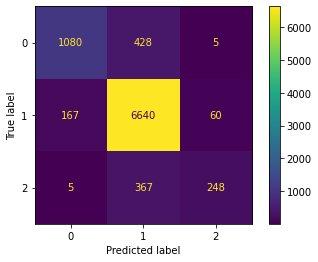

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred)

In [27]:
accuracy = accuracy_score(svm_pred, y_test)*100
accuracy

88.53333333333333

In [28]:
print("CLASSIFICATION_REPORT:")
print(classification_report(y_test, svm_pred))

CLASSIFICATION_REPORT:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1513
           1       0.89      0.97      0.93      6867
           2       0.79      0.40      0.53       620

    accuracy                           0.89      9000
   macro avg       0.85      0.69      0.75      9000
weighted avg       0.88      0.89      0.88      9000



In [29]:
review = "COVID-19 has made a terrible fear to everyone"
review_vector = tf_idf_vect.transform([review]) # vectorizing
val = model.predict(review_vector)
print({i for i in encoding if encoding[i]==val})

{'neg'}
